# Proyek Analisis Data: Nama dataset
- Nama: Dian Rizqi Saputra
- Email: dianrizqisaputra@gmail.com
- Id Dicoding: dianrizqisaputra

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi lingkungan terhadap penggunaan bike sharing?
2. Bagaimana pengaruh cuaca terhadap penggunaan bike sharing?
3. Bagai mana pengaruh hari kerja terhadap penggunaan bike sahring?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset'): #membuka file
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/hour.csv
/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/day.csv
/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/Readme.txt


In [ ]:
hour_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/hour.csv")
hour_bike.head()

day_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset/day.csv")
day_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
hour_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
day_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cleaning Data

In [ ]:
hour_bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
hour_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_bike.drop_duplicates(inplace=True)
hour_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
day_bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_bike.drop_duplicates(inplace=True)
day_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
hour_bike.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9519,9520,2012-02-06,1,1,2,14,0,1,1,1,0.40,0.4091,0.35,0.1642,14,126,140
12358,12359,2012-06-04,2,1,6,3,0,1,1,2,0.56,0.5303,0.60,0.1642,0,5,5
13290,13291,2012-07-12,3,1,7,23,0,4,1,2,0.70,0.6515,0.51,0.2239,33,178,211
1182,1183,2011-02-22,1,0,2,7,0,2,1,2,0.12,0.1212,0.80,0.2836,0,40,40
6798,6799,2011-10-15,4,0,10,20,0,6,0,1,0.50,0.4848,0.48,0.1343,42,137,179


In [ ]:
hour_bike.hr.value_counts().sort_index()

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

In [ ]:
hour_bike.loc[hour_bike["weathersit"] == 1, "weathersit"] = "Clear"
hour_bike.loc[hour_bike["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
hour_bike.loc[hour_bike["weathersit"] == 3, "weathersit"] = "Light Snow"
hour_bike.loc[hour_bike["weathersit"] == 4, "weathersit"] = "Heavy Rain"

hour_bike.weathersit.value_counts().sort_index()

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64

In [ ]:
hour_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,Mist + Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,Mist + Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
day_bike.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
46,47,2011-02-16,1,0,2,0,3,1,1,0.318261,0.316200,0.423478,0.251791,218,1897,2115
51,52,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
621,622,2012-09-13,3,1,9,0,4,1,1,0.612500,0.579558,0.637083,0.082721,1054,6750,7804
17,18,2011-01-18,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,9,674,683
496,497,2012-05-11,2,1,5,0,5,1,1,0.533333,0.520833,0.360417,0.236937,1319,5711,7030


In [ ]:
day_bike.loc[day_bike["season"] == 1, "season"] = "Springer"
day_bike.loc[day_bike["season"] == 2, "season"] = "Summer"
day_bike.loc[day_bike["season"] == 3, "season"] = "Fall"
day_bike.loc[day_bike["season"] == 4, "season"] = "Winter"

day_bike.season.value_counts().sort_index()

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

In [ ]:
day_bike.loc[day_bike["yr"] == 0, "yr"] = "2011"
day_bike.loc[day_bike["yr"] == 1, "yr"] = "2012"

day_bike.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

In [ ]:
day_bike.mnth.value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

In [ ]:
day_bike.loc[day_bike["holiday"] == 0, "holiday"] = "Holiday"
day_bike.loc[day_bike["holiday"] == 1, "holiday"] = "Not a Holiday"

day_bike.holiday.value_counts().sort_index()

Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

In [ ]:
day_bike.loc[day_bike["weekday"] == 0, "weekday"] = "Sun"
day_bike.loc[day_bike["weekday"] == 1, "weekday"] = "Mon"
day_bike.loc[day_bike["weekday"] == 2, "weekday"] = "Tue"
day_bike.loc[day_bike["weekday"] == 3, "weekday"] = "Wed"
day_bike.loc[day_bike["weekday"] == 4, "weekday"] = "Thu"
day_bike.loc[day_bike["weekday"] == 5, "weekday"] = "Fri"
day_bike.loc[day_bike["weekday"] == 6, "weekday"] = "Sat"

day_bike.weekday.value_counts().sort_index()

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

In [ ]:
day_bike.loc[day_bike["workingday"] == 0, "workingday"] = "Holiday"
day_bike.loc[day_bike["workingday"] == 1, "workingday"] = "Working Day"

day_bike.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

In [ ]:
day_bike.loc[day_bike["weathersit"] == 1, "weathersit"] = "Clear"
day_bike.loc[day_bike["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_bike.loc[day_bike["weathersit"] == 3, "weathersit"] = "Light Snow"
day_bike.loc[day_bike["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_bike.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

In [ ]:
day_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,Holiday,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,1,Holiday,Sun,Holiday,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,1,Holiday,Mon,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,1,Holiday,Tue,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,1,Holiday,Wed,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Springer,2012,12,Holiday,Thu,Working Day,Mist + Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Springer,2012,12,Holiday,Fri,Working Day,Mist + Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Springer,2012,12,Holiday,Sat,Holiday,Mist + Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Springer,2012,12,Holiday,Sun,Holiday,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Visualization & Explanatory Analysis

### 1. Bagaimana pengaruh kondisi lingkungan terhadap penggunaan bike sharing?

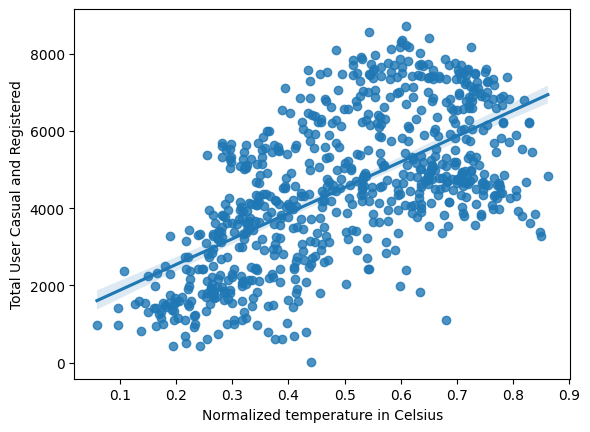

In [ ]:
# Berdasarkan temperatur

sns.regplot(x=day_bike["temp"], y=day_bike["cnt"])
plt.xlabel("Normalized temperature in Celsius")
plt.ylabel("Total User Casual and Registered")
plt.show()

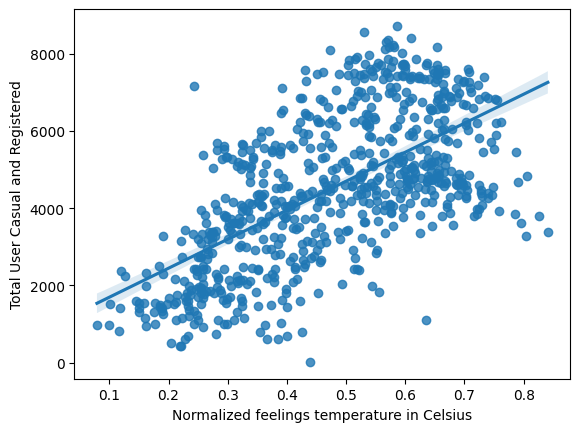

In [ ]:
# Berdasarkan feelings temperature

sns.regplot(x=day_bike["atemp"], y=day_bike["cnt"])
plt.xlabel("Normalized feelings temperature in Celsius")
plt.ylabel("Total User Casual and Registered")
plt.show()

### 2. Bagaimana pengaruh cuaca terhadap penggunaan bike sharing?

In [ ]:
byseason_bike = day_bike.groupby(by="weathersit").instant.nunique().reset_index()
byseason_bike.rename(columns={"instant": "sum"}, inplace=True)
byseason_bike

,weathersit,sum
0,Clear,463
1,Light Snow,21
2,Mist + Cloudy,247


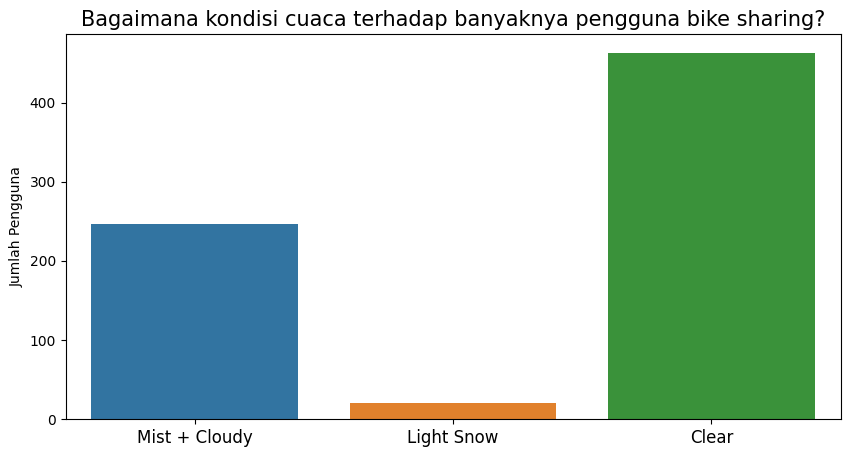

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="weathersit",
    data=byseason_bike.sort_values(by="weathersit", ascending=False),
)
plt.title("Bagaimana kondisi cuaca terhadap banyaknya pengguna bike sharing?", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### 3. Bagai mana pengaruh hari kerja terhadap penggunaan bike sahring?

In [ ]:
byworkingday_bike = day_bike.groupby(by="workingday").instant.nunique().reset_index()
byworkingday_bike.rename(columns={"instant": "sum"}, inplace=True)
byworkingday_bike

,workingday,sum
0,Holiday,231
1,Working Day,500


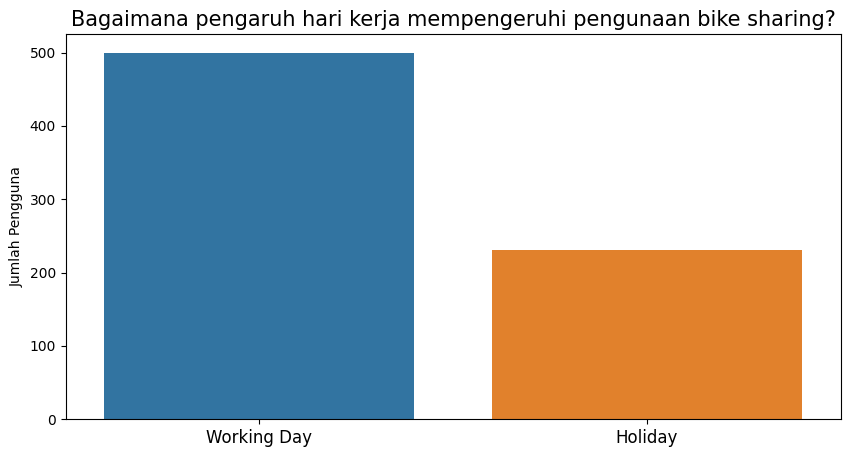

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="workingday",
    data=byworkingday_bike.sort_values(by="workingday", ascending=False),
)
plt.title("Bagaimana pengaruh hari kerja mempengeruhi pengunaan bike sharing?", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Conclusion

1. Terdapat dua faktor lainnya yang menyebabkan signifikasi pengguna bike sharing, yaitu suhu udara dan kecepatan angin. suhu udara yang panas dan kecepatan angin yang cukup kencang membuat orang lain enggan menggunakan sepeda, penggunaan kendaraan beratap dan ber-AC lebih disukai. Pengguna lebih suka bersepeda di cuaca yang tidak terlalu panas dan angin yang tidak cukup kencang.
2. Berdasarkan diagram di atas, bahwa kondisi cuaca mempengaruhi banyaknya pengguna bike sharing. kondisi cerah atau "Clear" merupakan Kondisi cuaca dengan pengguna bike sharing terbanyak, kondisi ini sangat cocok untuk bersepeda dibandingkan dengan kondisi cuaca mendung, hujan deras, atau bersalju.
3. Jumlah penggunaan Bike Sharing lebih banyak pada hari kerja dibanding pada hari libur. Hal ini menandakan bahwa, bike sharing lebih banyak digunakan untuk moda transportasi untuk berangkat kerja dibandingkan digunakan untuk jalan-jalan di hari libur.

In [ ]:
day_bike.to_csv("dashboard.csv", index=False)